In [1]:
import numpy as np
import pandas as pd
import missingno as mo

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize']=20,10

In [4]:
df = pd.read_csv('C:/Users/biju/Documents/timeseries/nse_data.csv')

In [5]:
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [6]:
df.isnull().values.any()

True

In [7]:
df_1 = df.drop(columns=['SERIES'], axis=1)

In [8]:
df_2= df_1.drop(columns=['SYMBOL', 'TIMESTAMP', 'ISIN'])

In [9]:
df_2.head()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
0,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,202
1,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,7353
2,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,748
3,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,437
4,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,1866


In [10]:
train_data = df_2[:746404]
test_data = df_2[746404:]

In [11]:
print(train_data.shape)
print(test_data.shape)

(746404, 9)
(100000, 9)


In [12]:
x_train = train_data.drop(columns=['CLOSE'],axis=1)
y_train = train_data['CLOSE']

In [13]:
x_train.head()

,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
0,37.80,37.80,36.15,37.40,37.05,27130,994657.90,202
1,4.10,4.85,4.00,4.65,4.05,20157058,92148517.65,7353
2,13425.15,13469.55,12920.00,13300.00,13460.55,2290,30304923.35,748
3,61.00,61.90,60.35,61.10,60.65,27701,1689421.00,437
4,546.10,548.00,535.00,535.20,547.45,79722,43208620.05,1866


In [14]:
y_train.head()

0       36.85
1        4.55
2    13266.70
3       61.00
4      537.45
Name: CLOSE, dtype: float64

In [15]:
y_train.count

<bound method Series.count of 0            36.85
1             4.55
2         13266.70
3            61.00
4           537.45
            ...   
746399       44.75
746400      159.85
746401      475.30
746402       18.35
746403      267.95
Name: CLOSE, Length: 746404, dtype: float64>

In [16]:
x_train.count

<bound method DataFrame.count of             OPEN      HIGH       LOW      LAST  PREVCLOSE  TOTTRDQTY  \
0          37.80     37.80     36.15     37.40      37.05      27130   
1           4.10      4.85      4.00      4.65       4.05   20157058   
2       13425.15  13469.55  12920.00  13300.00   13460.55       2290   
3          61.00     61.90     60.35     61.10      60.65      27701   
4         546.10    548.00    535.00    535.20     547.45      79722   
...          ...       ...       ...       ...        ...        ...   
746399     46.60     46.60     44.50     44.80      46.40     213343   
746400    156.00    162.85    155.00    161.40     156.25     424247   
746401    493.00    494.00    470.00    474.75     490.00        793   
746402     18.25     18.50     18.15     18.30      18.55     962006   
746403    274.05    275.45    265.05    268.25     277.50     258306   

          TOTTRDVAL  TOTALTRADES  
0         994657.90          202  
1       92148517.65         7353

In [17]:
scale = MinMaxScaler(feature_range=(0,1))
x_t = scale.fit_transform(x_train)
x_train = pd.DataFrame(x_t)

In [18]:
x_train.head()

,0,1,2,3,4,5,6,7
0,0.000315,0.000315,0.000301,0.000312,0.000308,0.000035,0.000007,0.000168
1,0.000034,0.000040,0.000033,0.000039,0.000033,0.025782,0.000646,0.006163
2,0.111885,0.112255,0.107675,0.110843,0.112180,0.000003,0.000212,0.000626
3,0.000508,0.000515,0.000503,0.000509,0.000505,0.000035,0.000012,0.000365
4,0.004551,0.004567,0.004458,0.004460,0.004562,0.000102,0.000303,0.001563


In [26]:
grid = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12]}

In [27]:
knn_obj = neighbors.KNeighborsRegressor()
model= GridSearchCV(estimator=knn_obj, param_grid=grid,cv=3)

In [28]:
model.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
test_data.head()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES
746404,97.00,99.90,94.40,94.70,94.6,97.85,11938,1143262.95,362
746405,3.50,3.50,3.20,3.20,3.2,3.55,57148,184412.90,92
746406,66.10,66.10,60.55,61.35,62.7,65.00,12813,816569.70,68
746407,21.25,22.40,21.25,22.05,22.3,21.80,223654,4918246.80,592
746408,22.30,22.35,20.50,20.90,20.9,21.45,11638,245572.00,62


In [30]:
x_test = test_data.drop(columns=['CLOSE'],axis=1)
y_test = test_data['CLOSE']

In [31]:
x_te = scale.fit_transform(x_test)
x_test = pd.DataFrame(x_te)

In [32]:
x_test.head()

,0,1,2,3,4,5,6,7
0,0.001319,0.001350,0.001309,0.001308,0.001331,0.000017,0.000016,0.000532
1,0.000047,0.000047,0.000044,0.000044,0.000048,0.000083,0.000003,0.000134
2,0.000899,0.000893,0.000839,0.000867,0.000884,0.000019,0.000011,0.000099
3,0.000288,0.000302,0.000294,0.000308,0.000296,0.000326,0.000069,0.000871
4,0.000303,0.000302,0.000284,0.000289,0.000291,0.000017,0.000003,0.000090


In [33]:
predictions = model.predict(x_test)

In [34]:
predictions.shape

(100000,)

In [35]:
predictions[:10]

array([ 157.275,    5.525,  103.525,   35.825,   34.875,   51.6  ,
        108.125,    2.95 , 1514.35 ,   91.2  ])

In [37]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))

In [39]:
print(rms)

1083.193825002156


c:\users\biju\.conda\envs\py363\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\biju\.conda\envs\py363\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


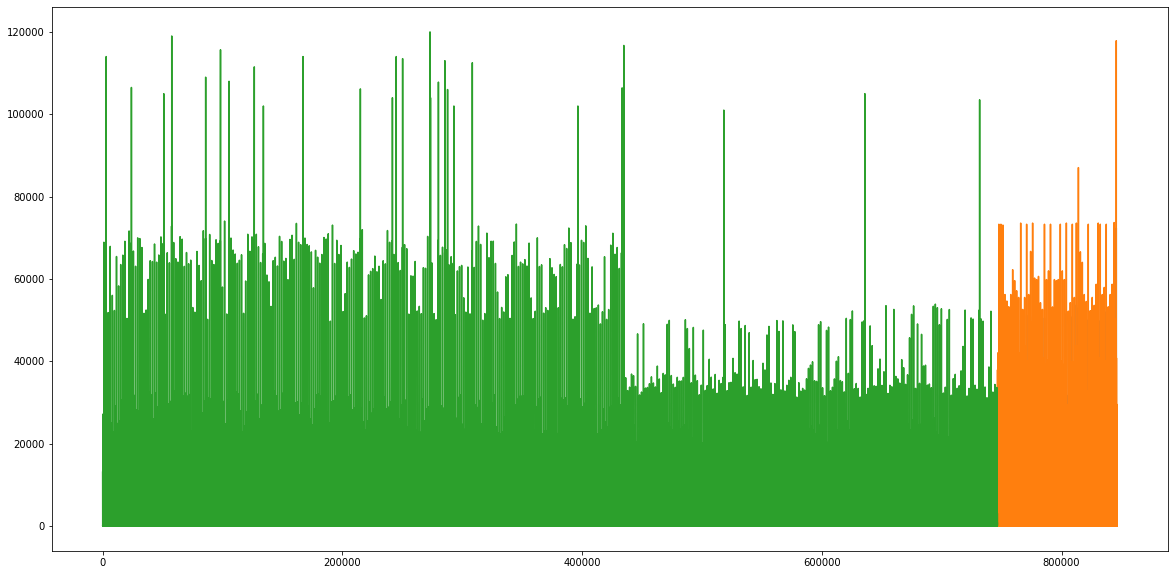

In [42]:
test_data['Predictions'] = 0
test_data['Predictions'] = predictions
plt.plot(test_data[['CLOSE', 'Predictions']])
plt.plot(train_data['CLOSE'])

In [43]:
test_data.head()

,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,Predictions
746404,97.00,99.90,94.40,94.70,94.6,97.85,11938,1143262.95,362,157.275
746405,3.50,3.50,3.20,3.20,3.2,3.55,57148,184412.90,92,5.525
746406,66.10,66.10,60.55,61.35,62.7,65.00,12813,816569.70,68,103.525
746407,21.25,22.40,21.25,22.05,22.3,21.80,223654,4918246.80,592,35.825
746408,22.30,22.35,20.50,20.90,20.9,21.45,11638,245572.00,62,34.875
